In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import xarray as xr

In [2]:
# Define a simple 2D convolutional layer with zeros padding
layer = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=(3,3),
    padding=1,
    padding_mode='zeros'
)

torch.Size([1, 1, 90, 180])


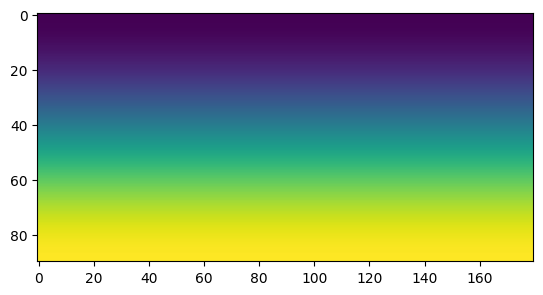

In [3]:
# Input data will be the Coriolis parameter which is zonally uniform
lat = np.arange(-90,90,2)
lat = np.sin(lat*np.pi/180)
f = np.expand_dims(lat, axis=1)
f = np.repeat(f, 180, axis=1)
f = torch.tensor(f).unsqueeze(0).unsqueeze(0)

print(f.shape)
plt.imshow(f[0,0].detach())
plt.show()

In [4]:
out = layer(torch.tensor(f).float())
print(out.shape)

torch.Size([1, 1, 90, 180])


/tmp/ipykernel_9652/1253593369.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = layer(torch.tensor(f).float())


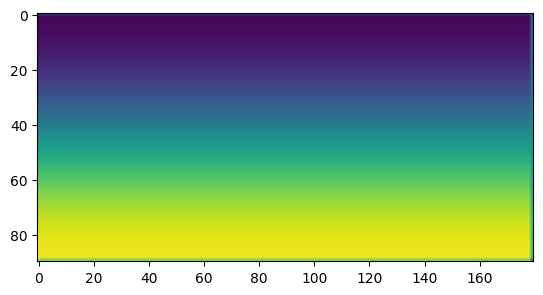

In [5]:
plt.imshow(out[0,0].detach())
plt.show()

Notice the border in the plot above! Let's plot the data along a line of constant latitude to get a better look.

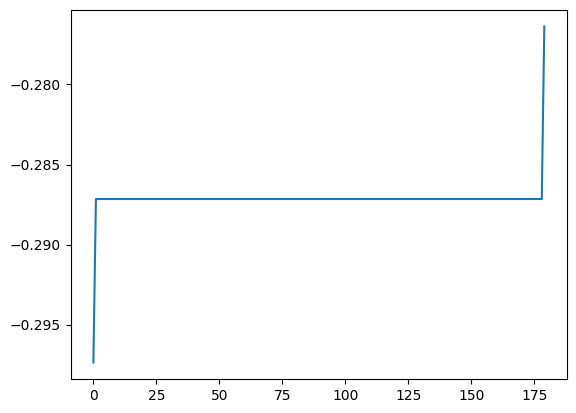

In [6]:
plt.plot(out[0,0,45].detach())
plt.show()

Our CNN output a different value at the "edges" of our "image", which is undesireable for making global predictions. Let's fix that by writing our own custom padding function.

In [ ]:
# Write your own padding function!

def lat_lon_pad(x, pad):
    # Assumes x has shape [batch, channel, height, width]

    pass

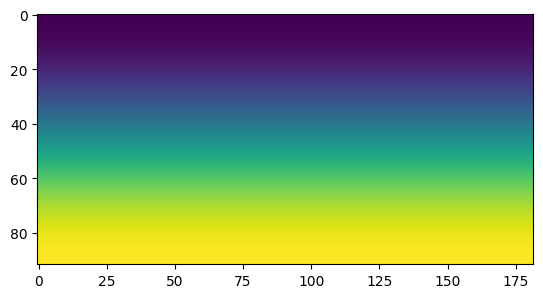

In [8]:
f_padded = lat_lon_pad(f, pad=1)
plt.imshow(f_padded[0,0])
plt.show()

In [9]:
layer = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=(3,3),
    padding=0 # We did the padding ourselves!
)

out = layer(torch.tensor(f_padded).float())
print(out.shape)

torch.Size([1, 1, 90, 180])


/tmp/ipykernel_9652/1640526821.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = layer(torch.tensor(f_padded).float())


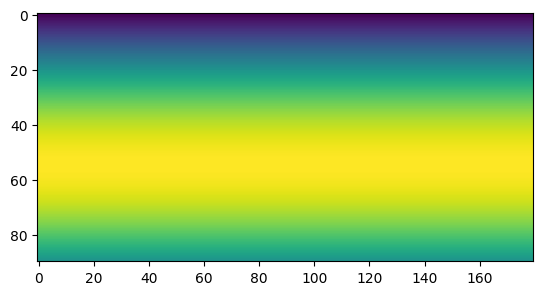

In [10]:
plt.imshow(out[0,0].detach())
plt.show()

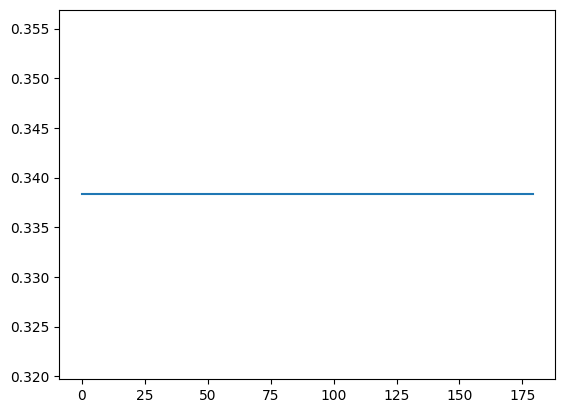

In [11]:
plt.plot(out[0,0,45].detach())
plt.show()

Now let's test your padding scheme with real topography data.

In [12]:
topography = xr.open_dataset('era5_topography.nc').isel(valid_time=0)['z'].data

torch.Size([1, 1, 721, 1440])


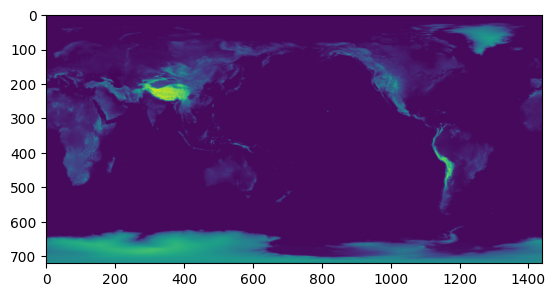

In [13]:
topography = torch.tensor(topography).unsqueeze(0).unsqueeze(0)

print(topography.shape)
plt.imshow(topography[0,0].detach())
plt.show()

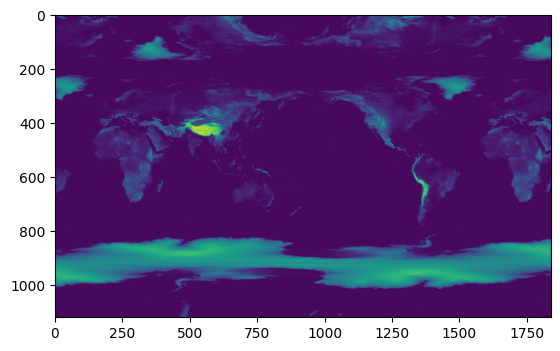

In [14]:
topography_padded = lat_lon_pad(topography, pad=200)
plt.imshow(topography_padded[0,0])
plt.show()